In [1]:
import requests
import time
import pandas as pd
import surprise as surprise
import numpy as np
from decimal import Decimal
from scipy.sparse import coo_matrix
from scipy import sparse
from tqdm import tqdm
# косинусовое сходство
from sklearn.metrics.pairwise import cosine_similarity

## Косинусное расстояние

In [40]:
M=np.array([[4,5,4,0,3,3],[3,3,3,2,4,5]])
def calculate_cosine_distance_cor(M):
    Res = np.empty((M.shape[0],M.shape[0]))
    def my_cosine_distance(i,j):
        return np.sum(M[i,:]*M[j,:])/(np.sqrt(np.sum(np.square(M[i,:])))*np.sqrt(np.sum(np.square(M[j,:]))))
    for i in tqdm(range(M.shape[0])):
        for j in range(i,M.shape[0]):
            calculated = my_cosine_distance(i,j);
            if (i==j):
                Res[i,j]=calculated
            else:
                Res[i,j]=Res[j,i]=calculated
    return sparse.csr_matrix(Res)

cor = calculate_cosine_distance_cor(M)
print(cor.toarray())

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

[[1.         0.89814624]
 [0.89814624 1.        ]]


## Коэффициент Пирсона
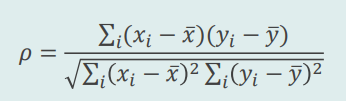

In [16]:
M=np.array([[4,5,4,0,3,3],[3,3,3,2,4,5]])
# M=np.array([[0,0,0,0,3,0],[0,3,0,0,0,0]])

def calculate_pearson_distance_cor(M):
    Res = np.empty((M.shape[0],M.shape[0]))
    def my_pearson_distance(i,j):
        i_mean = np.sum(M[i,:])/(M[i,:]!=0).sum()
        print(i_mean)
 
        j_mean = np.sum(M[j,:])/(M[j,:]!=0).sum()
        print(j_mean)

        i_minus_i_mean = np.where((M[i,:]!=0) &(M[j,:]!=0), M[i,:]-i_mean, 0)
     
        j_minus_j_mean = np.where((M[i,:]!=0) &(M[j,:]!=0), M[j,:]-j_mean, 0)
  
        numerator = np.sum(i_minus_i_mean*j_minus_j_mean)

        denumerator = (np.sqrt(np.sum(np.square(i_minus_i_mean)))*np.sqrt(np.sum(np.square(j_minus_j_mean))))
   
        return numerator/denumerator
    for i in range(M.shape[0]):
        for j in range(i,M.shape[0]):
            calculated = my_pearson_distance(i,j);
            if (i==j):
                Res[i,j]=calculated
            else:
                Res[i,j]=Res[j,i]=calculated
    Res[np.isnan(Res)] = 0
    return sparse.csr_matrix(Res)

cor = calculate_pearson_distance_cor(M)
print(cor.toarray())
# a = np.sum(M[0,:])/(M[0,:]!=0).sum()
# print(a)
# b = np.sum(M[1,:])/(M[1,:]!=0).sum()
# print(b)
# aa = np.where((M[0,:]!=0) &(M[1,:]!=0), M[0,:]-a, 0)
# print(aa)
# bb = np.where((M[0,:]!=0) &(M[1,:]!=0), M[1,:]-b, 0)
# print(bb)
# c = np.sum(aa*bb)
# print(c)
# d = (np.sqrt(np.sum(np.square(aa)))*np.sqrt(np.sum(np.square(bb))))
# print(c/d)
# print(np.where(M[0,:], M[1,:]-b, M[0,:]))

3.8
3.8
3.8
3.3333333333333335
3.3333333333333335
3.3333333333333335
[[ 1.         -0.76063883]
 [-0.76063883  1.        ]]


## Коэффициент Отиаи (normalized cosine)


In [19]:
M=np.array([[4,5,4,0,3,3],[3,3,3,2,4,5]])
# M=np.array([[0,0,0,0,3,0],[0,3,0,0,0,0]])

def calculate_otiai_distance_cor(M):
    Res = np.empty((M.shape[0],M.shape[0]))
    def my_otiai_distance(i,j):
        i_mean = np.sum(M[i,:])/(M[i,:]!=0).sum()
        print(i_mean)
 
        j_mean = np.sum(M[j,:])/(M[j,:]!=0).sum()
        print(j_mean)   

        i_minus_i_mean =  np.where((M[i,:]!=0), M[i,:]-i_mean, 0)
     
        j_minus_j_mean =  np.where((M[j,:]!=0), M[j,:]-j_mean, 0)
  
        numerator = np.sum(i_minus_i_mean*j_minus_j_mean)

        denumerator = (np.sqrt(np.sum(np.square(i_minus_i_mean)))*np.sqrt(np.sum(np.square(j_minus_j_mean))))
        return numerator/denumerator
    for i in range(M.shape[0]):
        for j in range(i,M.shape[0]):
            calculated = my_otiai_distance(i,j);
            if (i==j):
                Res[i,j]=calculated
            else:
                Res[i,j]=Res[j,i]=calculated
    Res[np.isnan(Res)] = 0
    return sparse.csr_matrix(Res)

cor = calculate_otiai_distance_cor(M)
print(cor.toarray())

3.8
3.8
3.8
3.3333333333333335
3.3333333333333335
3.3333333333333335
[[ 1.       -0.621059]
 [-0.621059  1.      ]]


In [78]:
M=np.array([[4,5,4,0,3,3],[3,3,3,2,4,5]])

In [79]:
# means = M[[0,1],:].mean(axis=(0))
# print(means)
# aa = M[0,:]-means
# bb = M[1,:]-means

a = M[0,:].mean()
print(a)
b = M[1,:].mean()
print(b)
aa = M[0,:]-a
print(aa)
bb = M[1,:]-b
print(bb)
c = np.sum(aa*bb)
print(c)
d = (np.sqrt(np.sum(np.square(aa)))*np.sqrt(np.sum(np.square(bb))))
print(c/d)


3.1666666666666665
3.3333333333333335
[ 0.83333333  1.83333333  0.83333333 -3.16666667 -0.16666667 -0.16666667]
[-0.33333333 -0.33333333 -0.33333333 -1.33333333  0.66666667  1.66666667]
2.6666666666666665
0.29981267559834457


In [73]:
M=np.array([[4,5,4,0,3,3],[3,3,3,2,4,5]])

## Симметричный коэффициент Жаккара
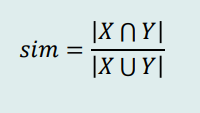

In [74]:
# симметричный коэффициент Жаккара
and_jack = np.where((M[0,:]!=0) & (M[1,:]!=0), 1, 0).sum()
print(and_jack)
or_jack = np.where((M[0,:]!=0) | (M[1,:]!=0), 1, 0).sum()
print(or_jack)
and_jack/or_jack
print(and_jack/or_jack)

5
6
0.8333333333333334


In [76]:
def calculate_jaccard_sim_distance_cor(M):
    Res = np.empty((M.shape[0],M.shape[0]))
    def my_jaccard_sim_distance(i,j):
        and_jack = np.where((M[i,:]!=0) & (M[j,:]!=0), 1, 0).sum() 
        or_jack = np.where((M[i,:]!=0) | (M[j,:]!=0), 1, 0).sum()

   
        return and_jack/or_jack
    for i in range(M.shape[0]):
        for j in range(i,M.shape[0]):
            calculated = my_jaccard_sim_distance(i,j);
            if (i==j):
                Res[i,j]=calculated
            else:
                Res[i,j]=Res[j,i]=calculated
    return sparse.csr_matrix(Res)

cor = calculate_jaccard_sim_distance_cor(M)
print(cor.toarray())

[[1.         0.83333333]
 [0.83333333 1.        ]]


## Асимметричный коэффициент Жаккара
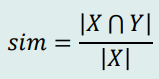

In [75]:
# асимметричный коэффициент Жаккара
and_jack = np.where((M[0,:]!=0) & (M[1,:]!=0), 1, 0).sum()
print(and_jack)
or_jack = np.where((M[0,:]!=0), 1, 0).sum()
print(or_jack)
and_jack/or_jack
print(and_jack/or_jack)

5
5
1.0


In [38]:
M=np.array([[1,1,1,1,1],[1,1,0,0,1],[1,1,0,1,0],[0,0,1,0,0],[0,0,0,0,1]])
def calculate_jaccard_asim_distance_cor(M):
    Res = np.empty((M.shape[0],M.shape[0]))
    def my_jaccard_asim_distance(i,j):
        and_jack = np.where((M[i,:]!=0) & (M[j,:]!=0), 1, 0).sum() 
        or_jack = np.where((M[i,:]!=0), 1, 0).sum()

   
        return and_jack/or_jack
    for i in range(M.shape[0]):
        for j in range(M.shape[0]):
            calculated = my_jaccard_asim_distance(i,j);
            Res[i,j]=calculated
    Res[np.isnan(Res)] = 0
    return sparse.csr_matrix(Res)

cor = calculate_jaccard_asim_distance_cor(M)
print(cor.toarray())

[[1.         0.6        0.6        0.2        0.2       ]
 [1.         1.         0.66666667 0.         0.33333333]
 [1.         0.66666667 1.         0.         0.        ]
 [1.         0.         0.         1.         0.        ]
 [1.         1.         0.         0.         1.        ]]


## Метод ассоциаций
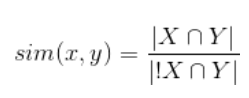

https://habr.com/ru/company/ivi/blog/247813/

In [37]:
M=np.array([[1,1,1,1,1],[1,1,0,0,1],[1,1,0,1,0],[0,0,1,0,0],[0,0,0,0,1]])
def calculate_associations_distance_cor(M):
    Res = np.empty((M.shape[0],M.shape[0]))
    def my_associations_distance(i,j):
        and_i_j = np.where((M[i,:]!=0) & (M[j,:]!=0), 1, 0).sum() 
        and_not_i_j = np.where((M[i,:]==0) & (M[j,:]!=0), 1, 0).sum() 
        
   
        return and_i_j/and_not_i_j
    for i in range(M.shape[0]):
        for j in range(M.shape[0]):
            calculated = my_associations_distance(i,j);
#             if (i==j):
#                 Res[i,j]=calculated
#             else:
            Res[i,j]=calculated
    Res[np.isnan(Res)] = 0
    Res[np.isinf(Res)] = 0
    return sparse.csr_matrix(Res)

cor = calculate_associations_distance_cor(M)
print(cor.toarray())

[[0.   0.   0.   0.   0.  ]
 [1.5  0.   2.   0.   0.  ]
 [1.5  2.   0.   0.   0.  ]
 [0.25 0.   0.   0.   0.  ]
 [0.25 0.5  0.   0.   0.  ]]


<ipython-input-37-76d0b7426c3c>:9: RuntimeWarning: divide by zero encountered in long_scalars
  return and_i_j/and_not_i_j
